### 역전파 (Back Propagation)

- 순 전파 : 입력 층으로부터 출력층까지의 데이터의 이동
- 역 전파 : 출력 층으로부터 입력 층 까지의 오류(비용)함수 에 대하여 계산하고, 가중치가 이 함수에 미치는 영향을 계산하고, 이를 최소화 하는 방향으로 업데이트 한다.

- 경사 하강법의 역전파
    - 함수의 기울기(미분 : Gradient)를 사용하여 함수의 최솟값을 찾는 방법
        - 딥 러닝 에서의 최솟값은 비용함수(정답과의 거리의 함수) 를 최소화 하는 방향
    - 함수의 기울기 : 함수의 증가율을 보여줌
    - 오류가 역으로 전파하여 파라미터를 업데이트 한다.

- 역전파 과정
    - 순전파 → 손실계산 → 오류 역전파 → 가중치 업데이트 (경사 하강법 or 옵티마이저)

- 역전파의 장점
    - 속도의 향상
    - 심층 학습 가능

### 체인 룰

- 합성 함수:
    
    $$
    z = g(x) \\
    y = f(z) \\ \space \\ \text{and} \\ \space \\
    y = f(g(x))
    $$
    
- 체인 룰:
    
    $$
    \frac{\partial y}{\partial x} = 
    
    \frac{\partial y}{\partial g(x)} \frac{\partial g(x)}{\partial x}
    
     = \frac{\partial y}{\partial z} \frac{\partial z}{\partial x}
    $$
    
    에서 $w$ 에 대한 $E$ 의 변화량으로 표현하면
    
    $$
    \frac{\partial E}{\partial w} = 
    \frac{\partial z_{out}}{\partial w}
    \frac{\partial \hat{y}_i}{\partial z_{out}}
    \frac{\partial E}{\partial \hat{y}}
    $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수와 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [2]:
# 입력 데이터와 타깃 데이터
X = np.array([[0,0], [0,1], [1,0], [1,1]]) # 2차원 입력
y = np.array([[0], [1], [1], [0]]) # XOR 문제

# 가중치 초기화
np.random.seed(1)
weights0 = 2 * np.random.random((2, 2)) - 1
weights1 = 2 * np.random.random((2, 1)) - 1

# 학습률
learning_rate = 0.1

# 오차와 가중치를 기록할 리스트 생성
errors = []
weights0_list = []
weights1_list = []

# weights1


In [3]:
# 학습 과정
for i in range(10000):
    # 전방 전파
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, weights0))
    layer2 = sigmoid(np.dot(layer1, weights1))

    # 오차 계산
    layer2_error = y - layer2

    if (i % 100) == 0:
        # 100회 마다 오차와 가중치 기록
        errors.append(np.mean(np.abs(layer2_error)))
        weights0_list.append(weights0)
        weights1_list.append(weights1)

    # 역전파 시작
    # 출력층에서의 기울기 계산
    layer2_delta = layer2_error * sigmoid_derivative(layer2)

    # 은닉층에서의 기울기 계산
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # 가중치 업데이트
    weights1 += learning_rate * layer1.T.dot(layer2_delta)
    weights0 += learning_rate * layer0.T.dot(layer1_delta)

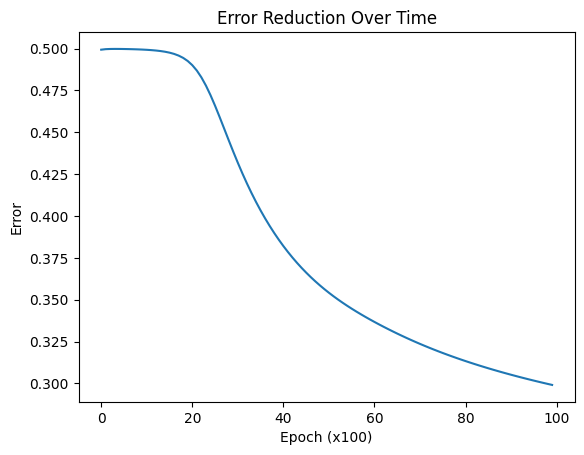

In [4]:
# 오차 기록 그래프로 표시
plt.plot(errors)
plt.title('Error Reduction Over Time')
plt.xlabel('Epoch (x100)')
plt.ylabel('Error')
plt.show()

# XOR 문제

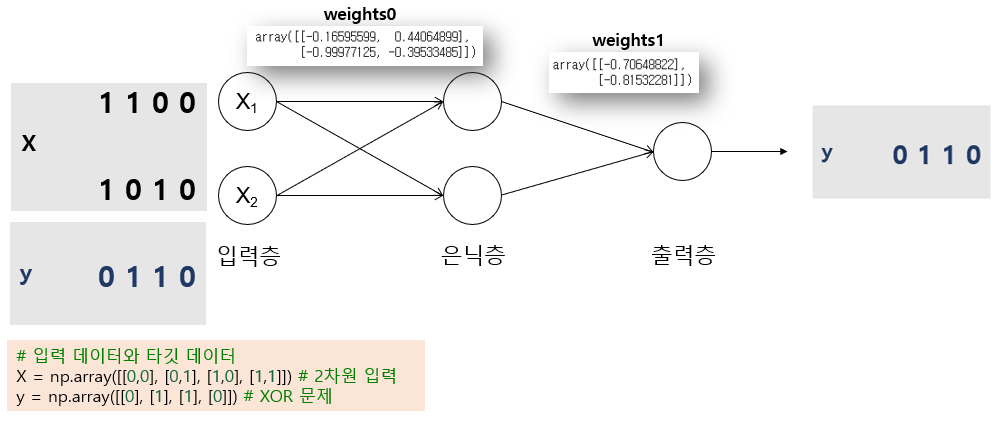